# Social Network Sentiment Analysis   
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1pxUaSM778-1GZASCo2t9W91RSsbsxoBN#scrollTo=kCE_C2OdhD1q)  

# N-grams analysis
An **n-gram** is a contiguous sequence of n items from a given sample of text or speech. They are basically a set of co-occuring words within a given window. When computing the n-grams, the shift is one-step forward (although you can move X words forward in more advanced scenarios)

In [ ]:
# import library for N-grams
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import word_tokenize
from nltk.util import ngrams
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Define function to generate most frequently occuring Bi-grams
def get_ngrams(corpus, ngram_range=(2, 2)):
    
    # Create CountVectorizer object from sklearn library with bigrams
    vec1 = CountVectorizer(ngram_range=ngram_range, max_features=2000).fit(corpus)

    # Create BoW feature representation using word frequency
    bag_of_words = vec1.transform(corpus)

    # compute sum of words
    sum_words = bag_of_words.sum(axis=0) 

    # create (word, frequency) tuples for bigrams
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

## **Bigrams**

In [ ]:
bigrams_comment = get_ngrams(df_reddit['comment'].tolist(), ngram_range=(2, 2))

# Convert bigrams of both datasets to a dataframe with column names bi-gram and frequency.
bigrams_comment_df = pd.DataFrame(bigrams_comment)
bigrams_comment_df.columns=["Bi-gram", "Freq"]


In [ ]:
# top 10 
bigrams_comment_df.head(10)

,Bi-gram,Freq
0,charging stations,25
1,climate change,20
2,years ago,17
3,fossil fuel,16
4,renewable energy,16
5,public transport,14
6,fuel efficient,14
7,per year,14
8,solar panels,14
9,luxury tax,13


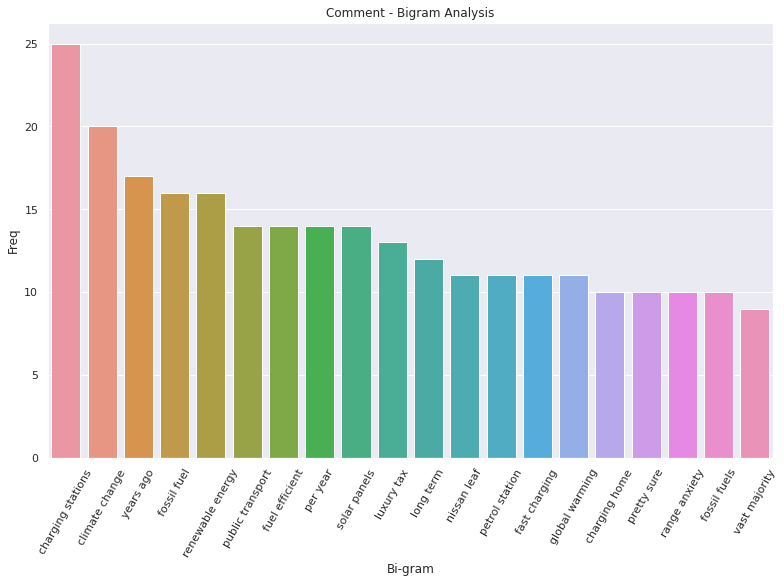

In [ ]:
# Barplot of most freq Bi-grams
top_bigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=bigrams_comment_df[:top_bigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=60)  # here rotation parameter shows the angle of your x-axis labels
plt.title('Comment - Bigram Analysis')
plt.show()

**insights**

## **Trigrams**

In [ ]:
trigrams_comment = get_ngrams(df_reddit['comment'].tolist(), ngram_range=(3, 3))

# Convert trigrams of both datasets to a dataframe with column names tri-gram and frequency.
trigrams_comment_df = pd.DataFrame(trigrams_comment)
trigrams_comment_df.columns=["Tri-gram", "Freq"]

In [ ]:
# top 10
trigrams_comment_df.head(10)

,Tri-gram,Freq
0,litres per kilometres,6
1,threshold fuel efficient,6
2,long term maintenance,5
3,term maintenance costs,5
4,fossil fuel industry,4
5,solved general use,4
6,lct threshold fuel,4
7,offer pensioners registration,3
8,pensioners registration price,3
9,registration price cut,3


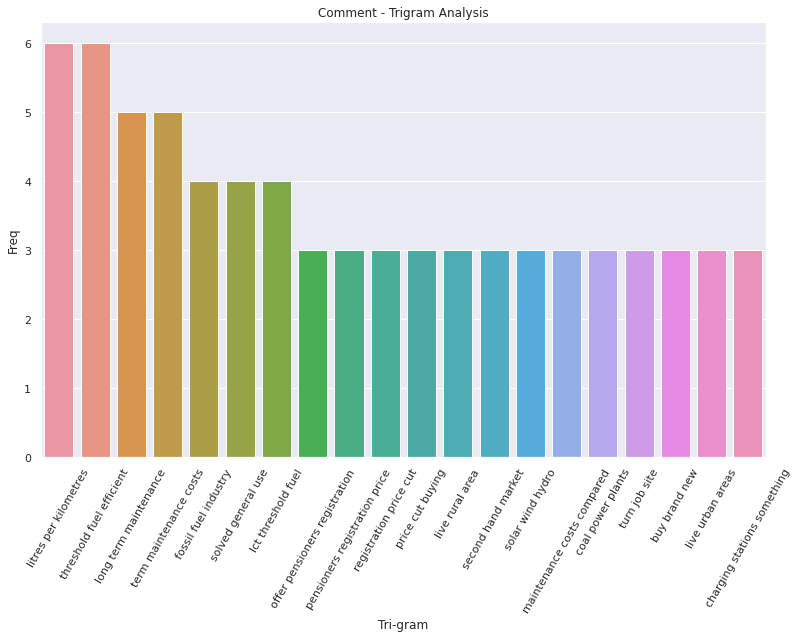

In [ ]:
# Barplot of most freq Tri-grams
top_trigrams_to_show = 20

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Tri-gram", y="Freq", data=trigrams_comment_df[:top_trigrams_to_show])
h.set_xticklabels(h.get_xticklabels(), rotation=60)
plt.title('Comment - Trigram Analysis')
plt.show()

**insight**

# Comment stats


## Post performance

In [ ]:
df_reddit_stats = pd.read_excel("EV_community_discussion_data.xlsx", sheet_name='Reddit')

In [ ]:
len(df_reddit_stats['title'].unique())

27

In [ ]:
# count nbr of comment by title
df_reddit_stats_title_comment_count = df_reddit_stats.groupby('title', as_index = False)[['comment']].count().sort_values(['comment'],ascending=False)
df_reddit_stats_title_comment_count.head(30)

,title,comment
3,Australia 'seven years' behind other nations a...,206
20,Tesla Model 3 electric vehicle smashes sales r...,186
16,Labor says electric cars 'unstoppable' and Coa...,141
8,"Back in November I posted the pic on the left,...",128
14,How far can an Electric Car make it in Australia?,127
11,Electric cars are already causing some grid fa...,116
13,Half of all new cars sold in Australia by 2035...,112
7,Australiaâ€™s paltry electric car uptake will ...,70
23,The reality of electric cars in Australia,58
5,Australia's first manufactured electric car 'n...,57


## Post engagement

In [ ]:
# count nbr of comment by day
df_reddit_stats_day_comment_count = df_reddit_stats.groupby('date', as_index = False)[['comment']].count().sort_values(['comment'],ascending=False)
df_reddit_stats_day_comment_count.head(5)

,date,comment
45,2020-03-06,142
46,2020-03-07,119
44,2020-03-05,91
37,2020-02-26,79
36,2020-02-25,77


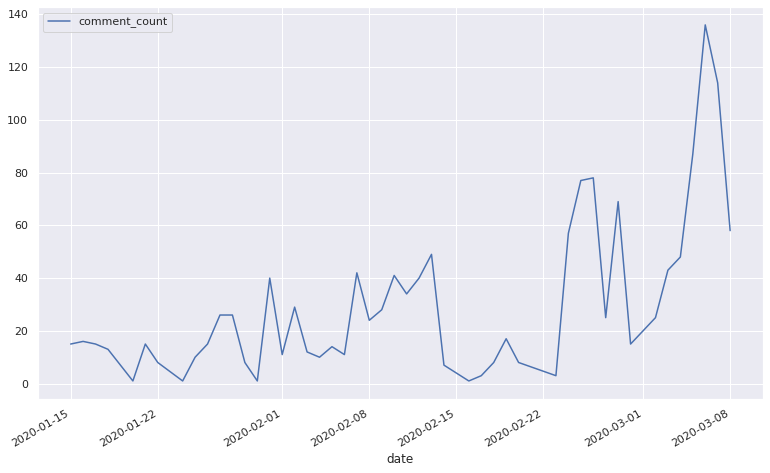

In [ ]:
# visualization
df_reddit_stats_day_comment_count = df_reddit.groupby(['date'])['comment'].count().reset_index(name='comment_count').set_index('date')

ax = df_reddit_stats_day_comment_count.plot()
plt.savefig('temporal_analysis.png', dpi=800)


In [ ]:
# Plot comment sentiment timeline
import plotly.express as px
df_reddit_stats_day_comment_count = df_reddit.groupby(['date'])['comment'].count().reset_index(name='comment_count')

fig = px.line(df_reddit_stats_day_comment_count, x="date", y="comment_count", title='Comment over time on Reddit')
fig.show()

# Sentiment Analysis  

Using Sentiment analysis to determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral.  

*Using Textblob library. The sentiment function of textblob returns the polarity of the sentence, i.e., a float value which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement and 0 mean neutral.*

In [ ]:
# import library
from textblob import TextBlob

Derive sentiment of each sentence.

In [ ]:
# Extract sentiments from the comments
df_reddit['sentiment'] = df_reddit['comment'].apply(lambda x: TextBlob(x).sentiment.polarity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# View first 20 comments with respective sentiment value
print(df_reddit[['comment', 'sentiment']][:20])

                                              comment  sentiment
0   time good enough city driving replace fossil f...   0.133333
1   chargefox chargers local westfield read takes ...   0.225000
2   exactly present glowing review almost full tim...   0.135714
3   ive thinking swap go system work battery type ...   0.200000
4   looking forward good information found chosen ...   0.261538
5   wow someone homework person wrote proud effort...   0.217857
6   owned nissan leaf us infrastructure better abs...   0.099688
7                                      yeah pull boat   0.000000
8   essentially viable interstaterural drives driv...   0.250000
9   chances government supporting anything envronm...  -0.005208
10  elec soon enough id rather better public trans...   0.137500
11  exactly technology better better excited every...   0.285000
12  progressive governments encourage explosion te...  -0.023377
13  lamp post charging sydney nearly thing seems s...   0.100000
14  read takes 15mins cha

**Categorize of comments**  as Negative, Neutral and Positive.

In [ ]:
# define function negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
# apply function and create another feature called Score and display the first 20 values.
df_reddit['Score'] = df_reddit['sentiment'].apply(getTextAnalysis)
df_reddit[['comment', 'sentiment', 'Score']].head(20)

,comment,sentiment,Score
0,time good enough city driving replace fossil f...,0.133333,Positive
1,chargefox chargers local westfield read takes ...,0.225000,Positive
2,exactly present glowing review almost full tim...,0.135714,Positive
3,ive thinking swap go system work battery type ...,0.200000,Positive
4,looking forward good information found chosen ...,0.261538,Positive
5,wow someone homework person wrote proud effort...,0.217857,Positive
6,owned nissan leaf us infrastructure better abs...,0.099688,Positive
7,yeah pull boat,0.000000,Neutral
8,essentially viable interstaterural drives driv...,0.250000,Positive
9,chances government supporting anything envronm...,-0.005208,Negative


## Overall sentiment score

Calculate the percentage of positive comments from all the tweets


In [ ]:
positive = df_reddit[df_reddit['Score'] == 'Positive']
print(str(positive.shape[0]/(df_reddit.shape[0])*100) + " % of positive comments")

48.39609483960948 % of positive comments


In [ ]:
negative = df_reddit[df_reddit['Score'] == 'Negative']
print(str(negative.shape[0]/(df_reddit.shape[0])*100) + " % of negative comments")

25.453277545327758 % of negative comments


In [ ]:
neutral = df_reddit[df_reddit['Score'] == 'Neutral']
print(str(neutral.shape[0]/(df_reddit.shape[0])*100) + " % of neutral comments")

26.15062761506276 % of neutral comments


**Representation of Sentiments of Words**

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count of Sentiment')

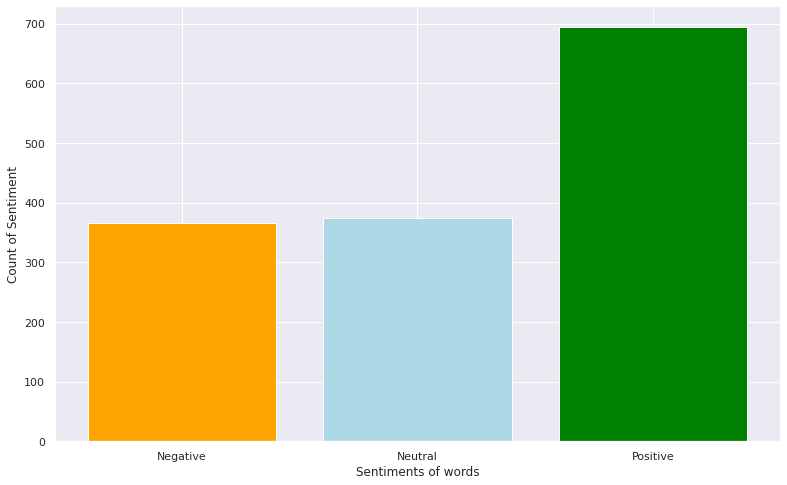

In [ ]:
labels = df_reddit.groupby('Score').count().index.values
values = df_reddit.groupby('Score').size().values
colors = ['orange', 'lightblue', 'green']

plt.bar(labels, values, color = colors)
plt.xlabel("Sentiments of words")
plt.ylabel("Count of Sentiment")

We can see how Negative, Neutral and Positive tweets about climate change since early 2018

## Generate word cloud  
By positive & negative sentiments

**Commonly used positive words**

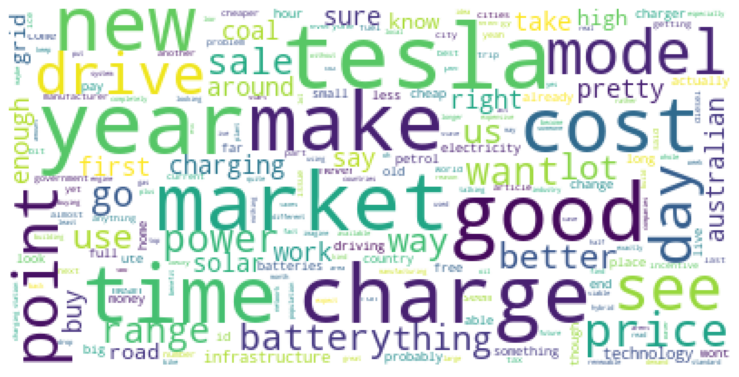

In [ ]:
corpus = list(df_reddit[(df_reddit['Score'] == 'Positive')]['comment'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
word_frequency = pd.Series(' '.join(df_reddit[(df_reddit['Score'] == 'Positive')]['comment']).split()).value_counts()
word_frequency[:10]

years       97
charging    95
charge      92
market      88
good        86
tesla       84
range       77
new         76
power       75
see         71
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



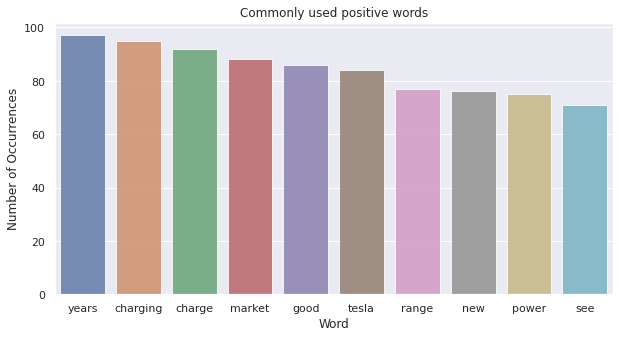

In [ ]:
# Visualize the top common positive word counts 
word_count  = word_frequency
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(word_count.index, word_count.values, alpha=0.8)
plt.title('Commonly used positive words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

**Commonly used negative words**

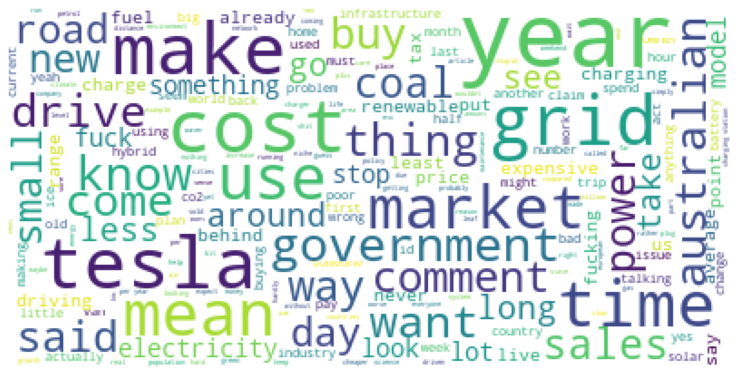

In [ ]:
corpus = list(df_reddit[(df_reddit['Score'] == 'Negative')]['comment'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
word_frequency = pd.Series(' '.join(df_reddit[(df_reddit['Score'] == 'Negative')]['comment']).split()).value_counts()
word_frequency[:10]

years       47
time        35
grid        35
cost        33
tesla       33
year        28
use         27
market      27
coal        26
charging    25
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



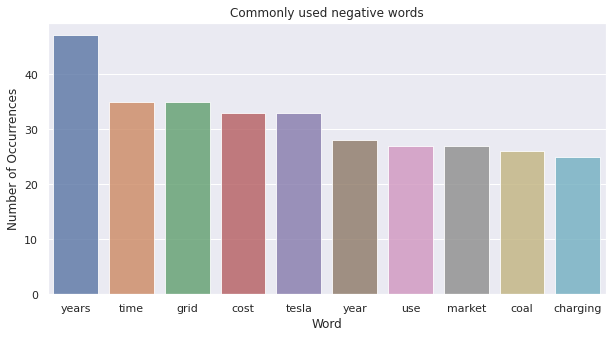

In [ ]:
# Visualize the top common positive word counts 
word_count  = word_frequency
word_count = word_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(word_count.index, word_count.values, alpha=0.8)
plt.title('Commonly used negative words')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.show()

## Sentiment over time  
Analyse sentiments for each comment, aggregate into the sentiment of particular day and derive a sentiment timeline.


Plot sentiment over time.

In [ ]:
# Plot comment sentiment timeline
# df_senti_reddit_date_wise = df_reddit.groupby(['date'])['sentiment'].mean().reset_index(name='mean_sentiment_comment').set_index('date')
# ax = df_senti_reddit_date_wise.plot()

In [ ]:
df_reddit_avg_senti = df_reddit.groupby(['date'])['sentiment'].mean().reset_index(name='mean_sentiment')

In [ ]:
# Plot comment sentiment timeline
import plotly.express as px

fig = px.line(df_reddit_avg_senti, x="date", y="mean_sentiment", title='Sentiment over time on Reddit')
fig.show()

**Comments and titles on 17 and 23 of Feb**  
*(negative comments)*

In [ ]:
# comments and titles on 20 to 23 Feb
# df_reddit_stats[(df_reddit_stats['date'] >= '2020-02-20') & (df_reddit_stats['date'] <= '2020-02-23')]
df_reddit_stats[(df_reddit_stats['date'] == '2020-02-17') | (df_reddit_stats['date'] == '2020-02-23')]

,id,comment,title,date
618,R619,Yeah most people will spend an hour stopped on...,Labor says electric cars 'unstoppable' and Coa...,2020-02-17
619,R620,You should 1v1 EV's bro.,Labor says electric cars 'unstoppable' and Coa...,2020-02-17
620,R621,Dad?,Labor says electric cars 'unstoppable' and Coa...,2020-02-17
655,R656,>I did think it really would not be possible b...,Labor says electric cars 'unstoppable' and Coa...,2020-02-23
656,R657,You're assuming i was fucking seruous!,Labor says electric cars 'unstoppable' and Coa...,2020-02-23
657,R658,No-one would care if the tax actually was used...,Labor says electric cars 'unstoppable' and Coa...,2020-02-23


# Topic modeling

In [ ]:
# create new df for modeling
df_processed = df_reddit

In [ ]:
# import libraries
import tempfile
import logging

In [ ]:
# Setting up the environment for LDA algorithm.
temp_df = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(temp_df))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


Folder "/tmp" will be used to save temporary dictionary and corpus.


In [ ]:
# Convert the tweets as the text corpus.
corpus = list(df_processed['comment'])

In [ ]:
# view first 5 copus
corpus[:5]

['time good enough city driving replace fossil fuel infrastructure drive anywhere economically forced',
 'chargefox chargers local westfield read takes 15mins charge 400km ultra fast chargers find costs charge fastitd bummer rock road trip spot find 3rd queue 2hr charge itll good supply stays bit ahead demand',
 'exactly present glowing review almost full time spent travelling spent charging drive done day day trip requires hotel etcrealistically current point time useful supplement combustion powered replacement years go yet point sooner better lots air pollution issues solve',
 'ive thinking swap go system work battery type battery charged tested swap dropped straight via automated service youd way faster petrol stop know',
 'looking forward good information found chosen best options sadly linking page harm good selecting slow ac chargers fast ones available plugshare handy finding chargers way places poor trip plannerinstead went selected example hyundai kona start end found route a

In [ ]:
# Tokenization
df_texts = [[word for word in str(document).split()] for document in corpus]

In [ ]:
# display first 5 values
df_texts[:5]

[['time',
  'good',
  'enough',
  'city',
  'driving',
  'replace',
  'fossil',
  'fuel',
  'infrastructure',
  'drive',
  'anywhere',
  'economically',
  'forced'],
 ['chargefox',
  'chargers',
  'local',
  'westfield',
  'read',
  'takes',
  '15mins',
  'charge',
  '400km',
  'ultra',
  'fast',
  'chargers',
  'find',
  'costs',
  'charge',
  'fastitd',
  'bummer',
  'rock',
  'road',
  'trip',
  'spot',
  'find',
  '3rd',
  'queue',
  '2hr',
  'charge',
  'itll',
  'good',
  'supply',
  'stays',
  'bit',
  'ahead',
  'demand'],
 ['exactly',
  'present',
  'glowing',
  'review',
  'almost',
  'full',
  'time',
  'spent',
  'travelling',
  'spent',
  'charging',
  'drive',
  'done',
  'day',
  'day',
  'trip',
  'requires',
  'hotel',
  'etcrealistically',
  'current',
  'point',
  'time',
  'useful',
  'supplement',
  'combustion',
  'powered',
  'replacement',
  'years',
  'go',
  'yet',
  'point',
  'sooner',
  'better',
  'lots',
  'air',
  'pollution',
  'issues',
  'solve'],
 ['

In [ ]:
# import libraries
from gensim import corpora, models, similarities
import os

2021-07-13 13:33:30,973 : INFO : 'pattern' package not found; tag filters are not available for English


In [ ]:
# Create a dictionary based on the tokanized words of all the tweets.
dictionary = corpora.Dictionary(df_texts)

# Save the above dictionary as a local file for LDA model to access.
dictionary.save(os.path.join(temp_df, 'df.dict'))

2021-07-13 13:33:31,952 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-07-13 13:33:32,011 : INFO : built Dictionary(7059 unique tokens: ['anywhere', 'city', 'drive', 'driving', 'economically']...) from 1434 documents (total 29178 corpus positions)
2021-07-13 13:33:32,015 : INFO : saving Dictionary object under /tmp/df.dict, separately None
2021-07-13 13:33:32,022 : INFO : saved /tmp/df.dict


In [ ]:
# Print the dictionary
print(dictionary.token2id)

{'anywhere': 0, 'city': 1, 'drive': 2, 'driving': 3, 'economically': 4, 'enough': 5, 'forced': 6, 'fossil': 7, 'fuel': 8, 'good': 9, 'infrastructure': 10, 'replace': 11, 'time': 12, '15mins': 13, '2hr': 14, '3rd': 15, '400km': 16, 'ahead': 17, 'bit': 18, 'bummer': 19, 'charge': 20, 'chargefox': 21, 'chargers': 22, 'costs': 23, 'demand': 24, 'fast': 25, 'fastitd': 26, 'find': 27, 'itll': 28, 'local': 29, 'queue': 30, 'read': 31, 'road': 32, 'rock': 33, 'spot': 34, 'stays': 35, 'supply': 36, 'takes': 37, 'trip': 38, 'ultra': 39, 'westfield': 40, 'air': 41, 'almost': 42, 'better': 43, 'charging': 44, 'combustion': 45, 'current': 46, 'day': 47, 'done': 48, 'etcrealistically': 49, 'exactly': 50, 'full': 51, 'glowing': 52, 'go': 53, 'hotel': 54, 'issues': 55, 'lots': 56, 'point': 57, 'pollution': 58, 'powered': 59, 'present': 60, 'replacement': 61, 'requires': 62, 'review': 63, 'solve': 64, 'sooner': 65, 'spent': 66, 'supplement': 67, 'travelling': 68, 'useful': 69, 'years': 70, 'yet': 71, '

In [ ]:
# Convert the text dictionary to bag of words model
corpus = [dictionary.doc2bow(text) for text in df_texts]

In [ ]:
# convert tweet to tokens and present it as id from the dictionary
comment_id = 0
print(df_texts[comment_id]) # each tweet converted to tokens
print(dictionary.doc2bow(df_texts[comment_id])) # each token is represented as a id from a dictionary

['time', 'good', 'enough', 'city', 'driving', 'replace', 'fossil', 'fuel', 'infrastructure', 'drive', 'anywhere', 'economically', 'forced']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


## Generate the topic model

In [ ]:
# Construct TF-IDF features from the dictionary.
tfidf = models.TfidfModel(corpus)

2021-07-13 13:33:37,129 : INFO : collecting document frequencies
2021-07-13 13:33:37,136 : INFO : PROGRESS: processing document #0
2021-07-13 13:33:37,151 : INFO : calculating IDF weights for 1434 documents and 7058 features (26580 matrix non-zeros)


In [ ]:
# Transform the tweets as TF-IDF feature vectors
corpus_tfidf = tfidf[corpus]

In [ ]:
#Define 20 topics capture through LDA.
total_topics = 20

In [ ]:
#Build the LDA topic model.
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf]

2021-07-13 13:33:40,633 : INFO : using symmetric alpha at 0.05
2021-07-13 13:33:40,636 : INFO : using symmetric eta at 0.05
2021-07-13 13:33:40,644 : INFO : using serial LDA version on this node
2021-07-13 13:33:40,680 : INFO : running online (single-pass) LDA training, 20 topics, 1 passes over the supplied corpus of 1434 documents, updating model once every 1434 documents, evaluating perplexity every 1434 documents, iterating 50x with a convergence threshold of 0.001000
2021-07-13 13:33:40,682 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-07-13 13:33:41,842 : INFO : -17.665 per-word bound, 207765.5 perplexity estimate based on a held-out corpus of 1434 documents with 29178 words
2021-07-13 13:33:41,846 : INFO : PROGRESS: pass 0, at document #1434/1434
2021-07-13 13:33:42,723 : INFO : topic #9 (0.050): 0.007*"years" + 0.005*"something" + 0.005*"good" + 0.005*"tesla" + 0.005*"around" + 0.004*"way

In [ ]:
# Print the Keyword in the 10 topics
lda.show_topics(total_topics, num_words=6)

[(0,
  '0.008*"model" + 0.005*"coal" + 0.005*"new" + 0.005*"charging" + 0.005*"cheaper" + 0.005*"make"'),
 (1,
  '0.008*"range" + 0.007*"market" + 0.006*"day" + 0.006*"want" + 0.005*"charge" + 0.004*"pay"'),
 (2,
  '0.007*"years" + 0.006*"time" + 0.005*"point" + 0.005*"coal" + 0.004*"range" + 0.004*"new"'),
 (3,
  '0.006*"charging" + 0.005*"years" + 0.005*"tax" + 0.005*"make" + 0.005*"point" + 0.005*"fuel"'),
 (4,
  '0.008*"sales" + 0.007*"coal" + 0.005*"market" + 0.005*"tesla" + 0.005*"us" + 0.005*"drop"'),
 (5,
  '0.006*"good" + 0.005*"us" + 0.005*"thing" + 0.004*"model" + 0.004*"charging" + 0.004*"tax"'),
 (6,
  '0.010*"charging" + 0.006*"tesla" + 0.006*"charge" + 0.006*"home" + 0.005*"network" + 0.005*"market"'),
 (7,
  '0.008*"charge" + 0.007*"tesla" + 0.006*"sales" + 0.006*"less" + 0.005*"fuel" + 0.005*"market"'),
 (8,
  '0.010*"years" + 0.007*"charging" + 0.007*"cost" + 0.007*"charge" + 0.007*"new" + 0.005*"come"'),
 (9,
  '0.007*"years" + 0.005*"something" + 0.005*"good" + 0.00

**insight**
From the keywords of the topics above we can see the importance of a keyword to the topic.  

**For example**: for the first topic: '0.065*"usa" + 0.035*"greenhousegas" + 0.035*"day" + 0.026*"india" + 0.024*"canada" + 0.022*"ghgt14"'). We can see the importance of the countries (usa, india, canada) and greenhouse gas and day in this topic. The weight of usa in this topic os 0.065. This topic could be the comparison of greenhouse gas emission between three countries over time.  

**The discussion in Australia on global warming and sustainability** has result: '0.093*"melbourne" + 0.084*"sydney" + 0.076*"sustainability" + 0.058*"brisbane" + 0.052*"canberra" + 0.050*"globalwarming"'). In which, state (location) names' weight are 0.093, 0.084, 0.058 and 0.052 for melbourne, sydney, brisbane and canberra.


## Interactive topic analyzer


In [ ]:
!pip install pyLDAvis==2.1.2
import pyLDAvis.gensim

     |████████████████████████████████| 1.6MB 23.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=faf829acc28cc451e0f0fa0245acf20935d3b6dbbf3248b8d9d7433f55e03722
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


2021-07-13 13:33:51,953 : INFO : Generating grammar tables from /usr/lib/python3.7/lib2to3/Grammar.txt
2021-07-13 13:33:51,983 : INFO : Generating grammar tables from /usr/lib/python3.7/lib2to3/PatternGrammar.txt
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [ ]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
13     -10.878068   10.538728       1        1  19.770012
10     -60.884026  -75.591820       2        1   8.967352
2       -2.336119  -53.289074       3        1   6.918992
17     -61.385319  -12.914634       4        1   6.240826
14     -28.737743  126.296997       5        1   6.211587
19       1.066606 -123.552811       6        1   6.158376
5       45.140720   -7.947869       7        1   6.147609
9     -140.795975  -98.530548       8        1   5.078099
6       61.531681  -83.240562       9        1   4.316449
12     -72.563057 -140.396881      10        1   3.863655
18      15.984491   63.578186      11        1   2.861479
11    -160.851624   68.945145      12        1   2.726627
4       85.961830   51.922935      13        1   2.629544
7      -99.020836  109.936348      14        1   2.624235
8     -176.764130   -8.681684      15        1   2.600168
3     -117.189880  -37.420200      16        1   2.598471
1      108.829918  -22.946203      17        1   2.582060
16      47.588097  121.934814      18        1   2.569089
0     -106.467834   30.176889      19        1   2.567685
15     -50.613804   59.328842      20        1   2.567684, topic_info=           Term      Freq     Total Category  logprob  loglift
70        years  4.000000  4.000000  Default  30.0000  30.0000
44     charging  4.000000  4.000000  Default  29.0000  29.0000
20       charge  3.000000  3.000000  Default  28.0000  28.0000
78         know  2.000000  2.000000  Default  27.0000  27.0000
1037      sales  2.000000  2.000000  Default  26.0000  26.0000
...         ...       ...       ...      ...      ...      ...
89          way  0.099241  3.302845  Topic20  -5.8588   0.1572
579   something  0.092571  2.212055  Topic20  -5.9284   0.4885
79       petrol  0.089606  2.199069  Topic20  -5.9609   0.4618
1258        yes  0.080572  1.517857  Topic20  -6.0672   0.7263
288       least  0.079977  1.434028  Topic20  -6.0746   0.7757

[2541 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1558      1  0.545794         act
788       1  0.579147       areas
874       1  0.539665  australian
923       1  0.495022         big
18        1  0.471445         bit
...     ...       ...         ...
89        1  0.302769         way
90        1  0.454325        work
898       1  0.573834       world
70        2  0.207449       years
70        3  0.207449       years

[74 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 11, 3, 18, 15, 20, 6, 10, 7, 13, 19, 12, 5, 8, 9, 4, 2, 17, 1, 16])